In [1]:
import tensorflow as tf
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, Input, Flatten, Lambda, Reshape
from keras.models import Model
from keras.datasets import mnist
import numpy as np
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
import random
from keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
import scipy.stats as stats

In [3]:
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()

batch = 60

train_samples = 10000
test_samples = 1000
#val_samples = int(train_samples * 0.2) 

x_train_list = list(x_train)
x_train_small = random.sample(x_train_list, train_samples)
x_train_small = np.array(x_train_small)

#val_list_small = random.sample(x_train_list, val_samples)
#val_list_small = np.array(val_list_small)

x_test_list = list(x_test)
x_test_small = random.sample(x_test_list, test_samples)
x_test_small = np.array(x_test_small)

x_train_small = x_train_small.astype('float32')
x_test_small = x_test_small.astype('float32')
#val_list_small = val_list_small.astype('float32')

x_train_small = x_train_small / 255
x_test_small = x_test_small / 255
#val_list_small = val_list_small/255

img_width  = x_train_small.shape[1]
img_height = x_train_small.shape[2]
num_channels = 1

x_train_small = np.reshape(x_train_small, (len(x_train_small), img_width, img_height, num_channels))
x_test_small = np.reshape(x_test_small, (len(x_test_small), img_width, img_height, num_channels))
#val_list_small= np.reshape(val_list_small, (len(val_list_small), img_width, img_height, num_channels)) 
img_shape = (img_height, img_width, num_channels)

In [4]:
(x_anomaly_train, _),(x_anomaly_test, _) = mnist.load_data()
anomaly_samples = 2000
_
anomaly_list = list(x_anomaly_train)
anomaly_data = random.sample(anomaly_list, anomaly_samples)
anomaly_data = np.array(anomaly_data)

anomaly_data = anomaly_data.astype('float32')
anomaly_data = anomaly_data / 255
anomaly_data = np.reshape(anomaly_data, (len(anomaly_data), img_width, img_height, num_channels))


anomaly_test_list = list(x_anomaly_test)
anomaly_test_data = random.sample(anomaly_test_list, anomaly_samples)
anomaly_test_data = np.array(anomaly_test_data)

anomaly_test_data = anomaly_test_data.astype('float32')
anomaly_test_data = anomaly_test_data / 255
anomaly_test_data = np.reshape(anomaly_test_data, (len(anomaly_test_data), img_width, img_height, num_channels))

In [5]:
print(type(x_train))
print(type(x_train_small))
print(type(anomaly_data))
print(len(x_train))
#print(len(val_list_small))
print(x_train.shape)
print(len(x_test))
print(x_test.shape)
print(len(x_train_small))
print(len(x_test_small))
print(len(anomaly_data))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
60000
(60000, 28, 28)
10000
(10000, 28, 28)
10000
1000
2000


[8576, 6386, 2145, 8880, 4652, 3434, 8794, 723, 4491, 9289]

Few of the training data samples are:


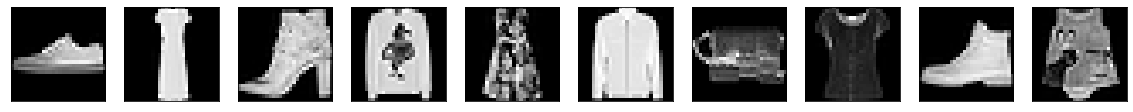

In [6]:
n = []
a = 0
for j in range(0, 10):
    n.append(random.randint(0, train_samples))
print(n)

print('\nFew of the training data samples are:')
plt.figure(figsize=(20, 4))
for i in n:
    a = a + 1
    ax = plt.subplot(2, 10, a)
    plt.imshow(x_train_small[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


[398, 132, 1541, 304, 200, 50, 1416, 956, 1655, 1008]

Few of the Anomaly data samples are:


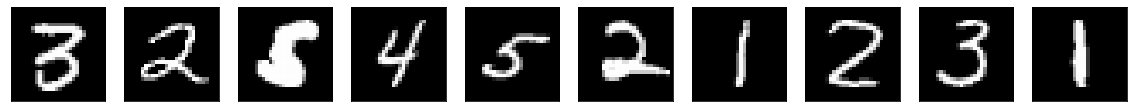

In [7]:
f = []
b = 0
for j in range(0, 10):
    f.append(random.randint(0, len(anomaly_data)-1))
print(f)

print('\nFew of the Anomaly data samples are:')
plt.figure(figsize=(20, 4))
             
for i in f:
    b = b + 1
    ax = plt.subplot(2, 10, b)
    plt.imshow(anomaly_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [45]:
input_img = keras.Input(shape = img_shape)

x = keras.layers.Conv2D(10, (3, 3), activation='relu', padding='same')(input_img)
#x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
#x = keras.layers.Conv2D(10, (3, 3), activation='relu', padding='same')(x)
#x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
#x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = keras.layers.Conv2D(10, (3, 3), activation='relu', padding='same')(encoded)
#x = keras.layers.UpSampling2D((2, 2))(x)
#x = keras.layers.Conv2D(10, (3, 3), activation='relu', padding='same')(x)
#x = keras.layers.UpSampling2D((2, 2))(x)
#x = keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = keras.layers.UpSampling2D((2, 2))(x)
decoded = keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics = ['accuracy'])

In [46]:
autoencoder.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_38 (Conv2D)          (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 14, 14, 10)        910       
                                                                 
 up_sampling2d_17 (UpSamplin  (None, 28, 28, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 28, 28, 1)         91  

In [47]:
a = autoencoder.fit(x_train_small, x_train_small,
                epochs= 25,
                batch_size=batch,
                shuffle=True,
                validation_data=(x_test_small, x_test_small))

Epoch 1/25
167/167 [==============================] - 3s 17ms/step - loss: 0.4197 - accuracy: 0.4987 - val_loss: 0.2892 - val_accuracy: 0.5197
Epoch 2/25
167/167 [==============================] - 3s 16ms/step - loss: 0.2872 - accuracy: 0.5090 - val_loss: 0.2743 - val_accuracy: 0.5200
Epoch 3/25
167/167 [==============================] - 3s 16ms/step - loss: 0.2768 - accuracy: 0.5094 - val_loss: 0.2665 - val_accuracy: 0.5205
Epoch 4/25
167/167 [==============================] - 3s 16ms/step - loss: 0.2706 - accuracy: 0.5097 - val_loss: 0.2619 - val_accuracy: 0.5206
Epoch 5/25
167/167 [==============================] - 3s 16ms/step - loss: 0.2671 - accuracy: 0.5098 - val_loss: 0.2593 - val_accuracy: 0.5207
Epoch 6/25
167/167 [==============================] - 3s 16ms/step - loss: 0.2651 - accuracy: 0.5098 - val_loss: 0.2580 - val_accuracy: 0.5208
Epoch 7/25
167/167 [==============================] - 3s 16ms/step - loss: 0.2636 - accuracy: 0.5099 - val_loss: 0.2564 - val_accuracy: 0.5208

In [48]:


decoded_imgs = autoencoder.predict(x_test_small)
decoded_imgs_anom = autoencoder.predict(anomaly_data)

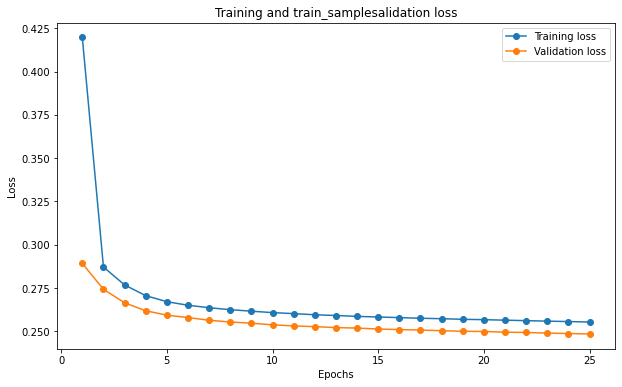

In [49]:
plt.rcParams["figure.figsize"] = (10,6)
loss = a.history['loss']
val_loss = a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, '-o', label='Training loss')
plt.plot(epochs, val_loss, '-o', label='Validation loss')
plt.title('Training and train_samplesalidation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The orignal images are:


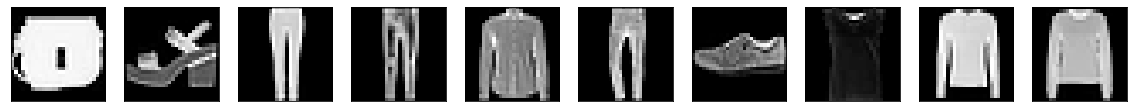


The reconstructed images are:


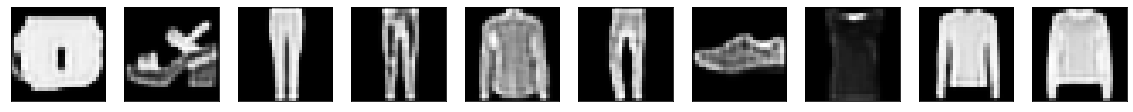

In [50]:
n = 10
plt.figure(figsize=(20, 4))
print("The orignal images are:")
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_small[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print("\nThe reconstructed images are:")
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [51]:
recon_error_list=[]

for i in range(1, 100):
    #print(x_test_small[i].shape,decoded_imgs[i].shape)
    reconstruction_error = autoencoder.evaluate([decoded_imgs[i]],[x_test_small[i]])
    recon_error_list.append(reconstruction_error)
recon_error_list = np.array(recon_error_list)  
#print(recon_error_list)

ano_recon_error_list=[]

for i in range(1, 100):
    #print(x_test_small[i].shape,decoded_imgs[i].shape)
    ano_recon_error = autoencoder.evaluate([decoded_imgs_anom[i]],[anomaly_data[i]])
    ano_recon_error_list.append(ano_recon_error)
ano_recon_error_list = np.array(ano_recon_error_list)

def Extract(lst):
    return [item[0] for item in lst]

recon_error_list = Extract(recon_error_list)
ano_recon_error_list = Extract(ano_recon_error_list)

1/1 [==============================] - 0s 16ms/step - loss: 0.1077 - accuracy: 0.7997


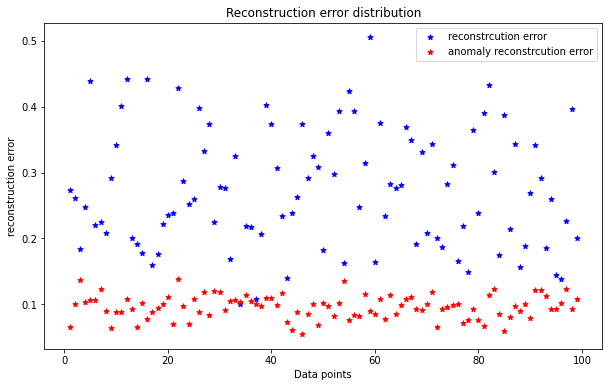

In [52]:
x = list(range(1,len(recon_error_list)+1,1))
y = list(range(1,len(ano_recon_error_list)+1,1))

plt.scatter(x, recon_error_list, label= "reconstrcution error", color= "blue", marker= "*", s=30)
plt.scatter(y, ano_recon_error_list, label= "anomaly reconstrcution error", color= "red", marker= "*", s=30)
plt.xlabel('Data points')
plt.ylabel('reconstruction error')
plt.title('Reconstruction error distribution')
plt.legend()
plt.show()


The distribution of the reconstruction error is:

The mean of the reconstruction error is 0.2742 
The standard deviation of the reconstruction error is 0.0890


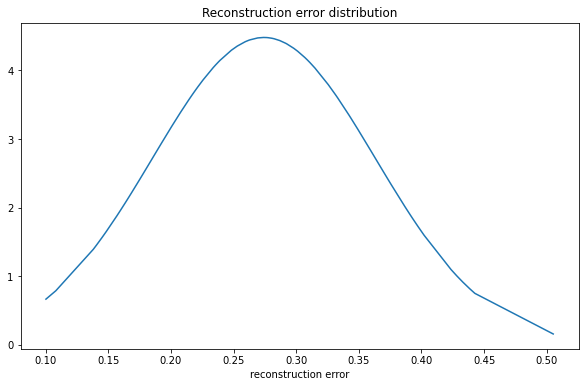

In [53]:
print("The distribution of the reconstruction error is:")

re = recon_error_list
re.sort()
re_mean = np.mean(re)
re_std = np.std(re)

print("\nThe mean of the reconstruction error is",format(re_mean,".4f"),
      "\nThe standard deviation of the reconstruction error is",format(re_std,".4f"))

pdf = stats.norm.pdf(re, re_mean, re_std)
plt.plot(re, pdf)
plt.xlabel('reconstruction error')
plt.title('Reconstruction error distribution')
#plt.xlim(0.3, 0.7)
plt.show()

The threshold values are as follows: 0.3632 , 0.1852

The thresholds can be visualised below:


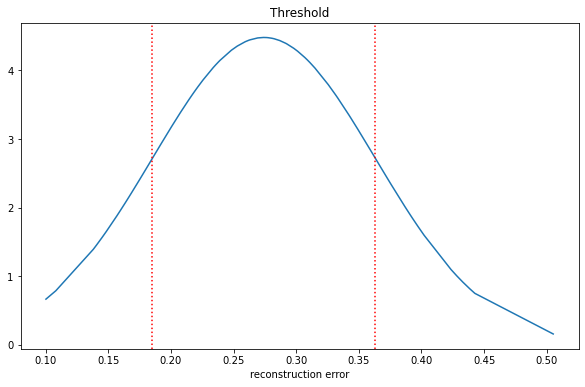

In [54]:
threshold = [re_mean + (1*re_std) ,re_mean - (1*re_std)]
print("The threshold values are as follows:",format(threshold[0],".4f"),",",format(threshold[1],".4f"))

print("\nThe thresholds can be visualised below:")

re = recon_error_list
re.sort()
re_mean = np.mean(re)
re_std = np.std(re)
pdf = stats.norm.pdf(re, re_mean, re_std)
plt.plot(re, pdf)
#plt.plot(threshold[0], 0, marker="o", markersize=10, markerfacecolor="red")
#plt.plot(threshold[1], 0, marker="o", markersize=10, markerfacecolor="red")
plt.axvline(x = threshold[0], color = 'red', linestyle='dotted')
plt.axvline(x = threshold[1], color = 'red', linestyle='dotted')
plt.xlabel('reconstruction error')
plt.title('Threshold')
plt.show()

In [58]:
test  = autoencoder.predict(anomaly_test_data)
anomaly_det= 0
test_data_nos = 500

for i in range(1, test_data_nos):
    test_reconstruction_error = autoencoder.evaluate(test[i],anomaly_data[i])
    if test_reconstruction_error[0] > threshold[0] or test_reconstruction_error[0] < threshold[1]:
        anomaly_det += 1

1/1 [==============================] - 0s 20ms/step - loss: 0.4606 - accuracy: 0.7864


In [59]:
accuracy = anomaly_det/test_data_nos *100
print("Accuracy of the model detecting an anomaly is: ",accuracy)

Accuracy of the model detecting an anomaly is:  85.6


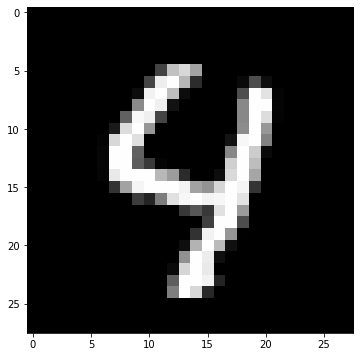

1/1 [==============================] - 0s 15ms/step - loss: 0.0948 - accuracy: 0.8227

The reconstruction error is:  0.0948
Anomaly Detected


In [56]:
test  = autoencoder.predict(anomaly_data)

plt.imshow(anomaly_data[0].reshape(28, 28))
plt.show()

test_reconstruction_error = autoencoder.evaluate(test[0],anomaly_data[0])
print('\nThe reconstruction error is: ',format(test_reconstruction_error[0],'.4f'))

if test_reconstruction_error[0] > threshold[0] or test_reconstruction_error[0] < threshold[1]:
    print("Anomaly Detected")
else:
    print("Data is Pure")